In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')


In [3]:
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4042,ham,I am literally in bed and have been up for lik...,NaN,NaN,NaN
3414,ham,He remains a bro amongst bros,NaN,NaN,NaN
4760,ham,It's Ì© only $140 ard...Ìä rest all ard $180 a...,NaN,NaN,NaN
1926,ham,Dont give a monkeys wot they think and i certa...,NaN,NaN,NaN
3098,ham,Ok... I din get ur msg...,NaN,NaN,NaN


In [4]:
df.shape


(5572, 5)

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [6]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4506,ham,He neva grumble but i sad lor... Hee... Buy tm...
3754,ham,"\Im on gloucesterroad what are uup to later?\"""""
705,ham,I don't think I can get away for a trek that l...
236,ham,Or ill be a little closer like at the bus stop...
1305,ham,Designation is software developer and may be s...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['target'] = encoder.fit_transform(df['target'])


In [9]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().sum()


target    0
text      0
dtype: int64

In [11]:
df.duplicated().sum()


403

In [12]:
df = df.drop_duplicates(keep='first')


In [13]:
df.duplicated().sum()


0

In [14]:
df['target'].value_counts()


target
0    4516
1     653
Name: count, dtype: int64

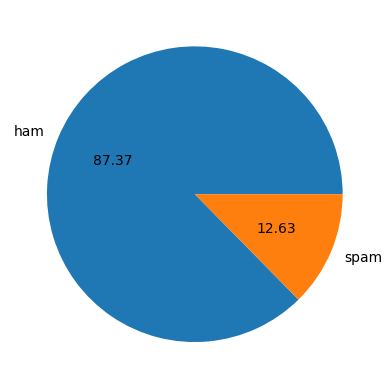

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [16]:
!pip install nltk


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\LENOVO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
import nltk


In [18]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['num_characters'] = df['text'].apply(len)


In [20]:
df.head()
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()



,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [22]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [25]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

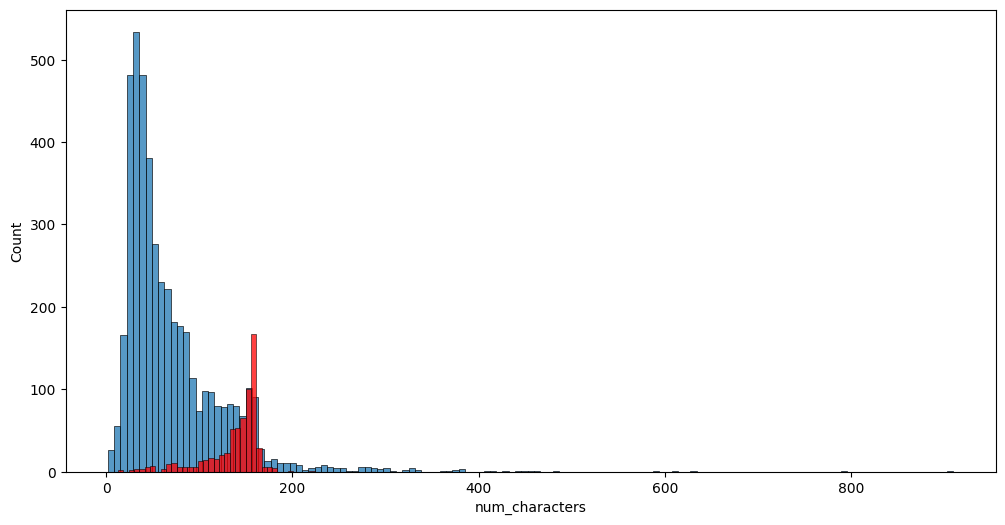

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

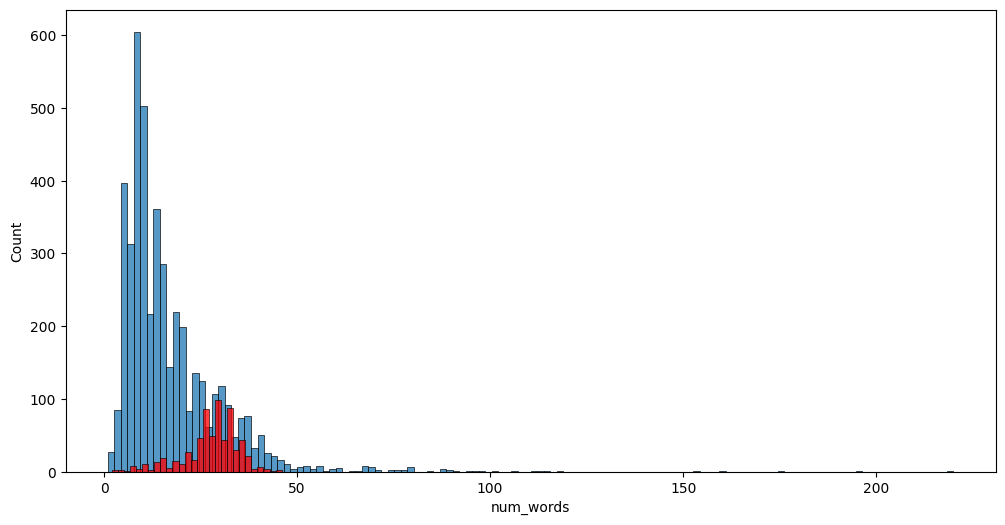

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

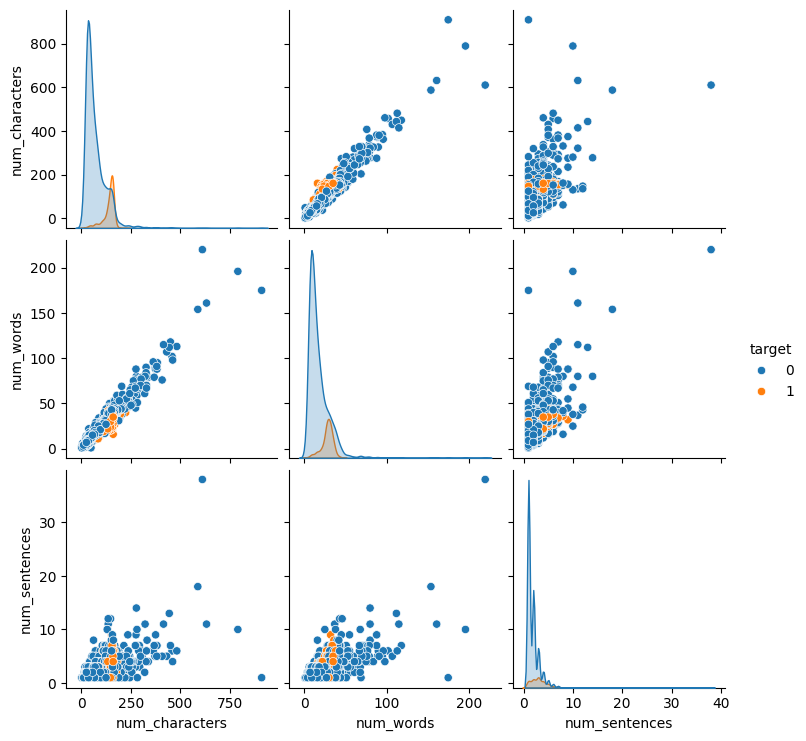

In [28]:
sns.pairplot(df,hue='target')


In [29]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
print(stop_words)
import string

{'above', 'are', "haven't", 'those', 'of', 'i', 'then', 'where', 'that', "wouldn't", "isn't", "shouldn't", "that'll", 'each', 'both', 'on', 'an', 'm', 'most', "won't", 'yours', 'too', 'for', 'you', "aren't", 'it', 'hers', 'should', 'theirs', 'so', 'him', 'what', 'if', 'as', 'do', 'the', 'his', 'some', "weren't", 'she', "doesn't", "don't", 'needn', 'we', 'why', 'down', 'aren', 've', 'up', 'who', "wasn't", 'by', 'while', 'how', 'won', 'under', 'am', 'can', 'mustn', 'wouldn', 'mightn', "couldn't", 'be', 'is', 'through', 'few', "you're", 'below', 'before', 'any', 'ourselves', 'did', 'and', 'very', 'yourself', 're', 'didn', "hasn't", 'being', 'our', 'doesn', 'will', 'their', 'out', 'don', 'this', 'same', 'wasn', 'her', 'than', 'your', 'at', 'they', 'own', 'there', 'hasn', 'more', 'haven', 'had', "should've", 'nor', "mustn't", 'until', 'y', 'which', 'hadn', 'in', 'themselves', 'between', 'now', "didn't", "hadn't", 'myself', 'from', 'does', 'other', 'not', 'whom', 'having', 'after', 'll', 'yo

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

# Download required resources
nltk.download('stopwords')

# Create an instance of PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize text
    text = nltk.word_tokenize(text)
    
    # Remove stopwords and punctuation
    y = []
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(word)
    
    # Stem the words
    y = [ps.stem(word) for word in y]
    
    # Return the processed text
    return " ".join(y)

# Example usage
result = transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(result)


'm gon na home soon n't want talk stuff anymor tonight k 've cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df['text'][10]


"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [32]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [33]:
df['transformed_text'] = df['text'].apply(transform_text)


In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [35]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


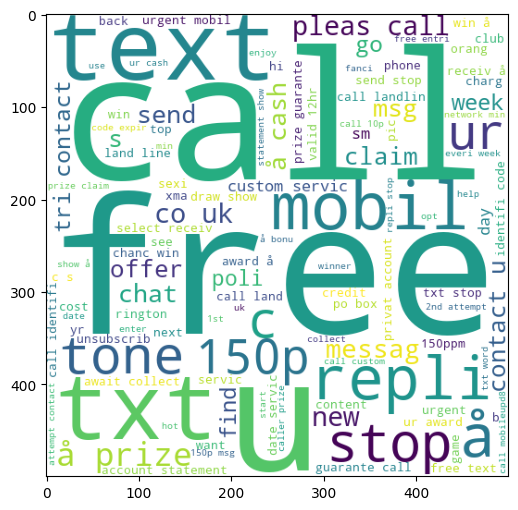

In [36]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [37]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


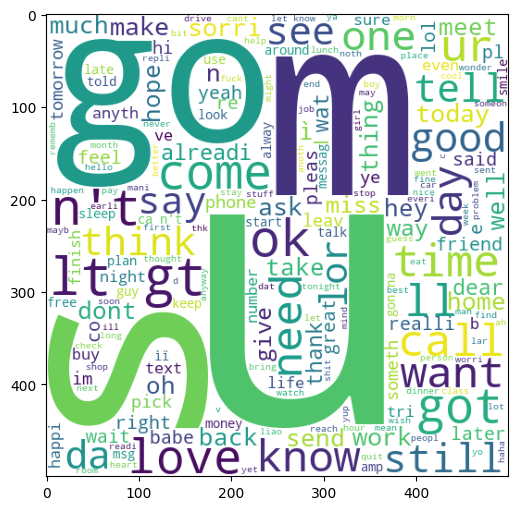

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [39]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [40]:
len(spam_corpus)


11083

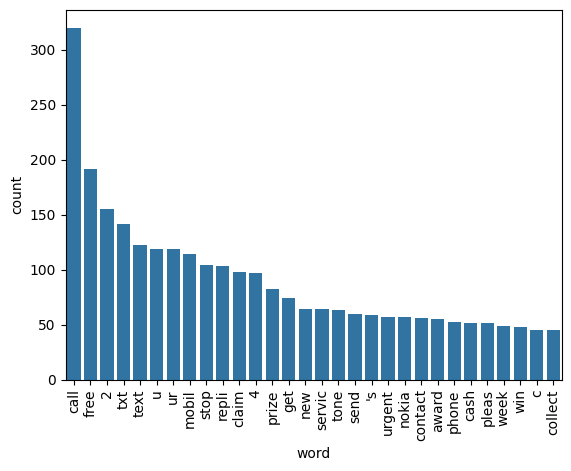

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

# Assuming spam_corpus is already defined and contains the text data

# Create a DataFrame from the most common 30 words in spam_corpus
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot the data
sns.barplot(x='word', y='count', data=word_counts)

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [42]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [43]:
len(ham_corpus)


39894

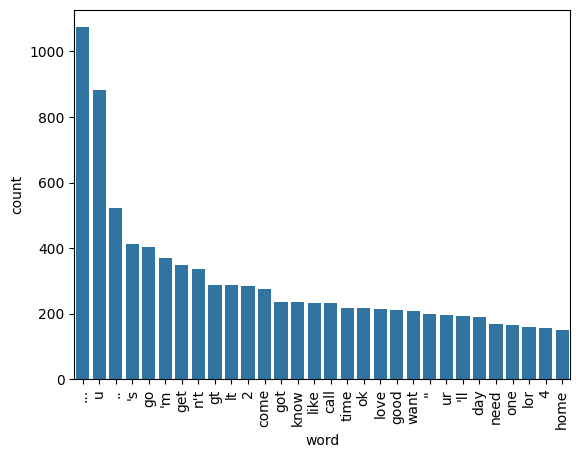

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

# Assuming ham_corpus is already defined and contains the text data

# Create a DataFrame from the most common 30 words in ham_corpus
word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot the data
sns.barplot(x='word', y='count', data=word_counts)

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [46]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [47]:
y = df['target'].values


In [48]:
from sklearn.model_selection import train_test_split


In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [50]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [51]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8752417794970987
[[789 107]
 [ 22 116]]
0.5201793721973094


In [53]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


In [54]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.988394584139265
[[896   0]
 [ 12 126]]
1.0


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [56]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [57]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [58]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [59]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.97678916827853, 0.975)

In [60]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.975
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9738878143133463
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.83
For  LR
Accuracy -  0.9574468085106383
Precision -  0.9519230769230769
For  RF
Accuracy -  0.97678916827853
Precision -  0.9830508474576272


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.971953578336557
Precision -  0.9504132231404959
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8571428571428571
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9682539682539683
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.946236559139785
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9586776859504132


In [61]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [62]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
2,NB,0.973888,1.000000
5,RF,0.976789,0.983051
0,SVC,0.976789,0.975000
8,ETC,0.980658,0.968254
10,xgb,0.973888,0.958678
4,LR,0.957447,0.951923
6,AdaBoost,0.971954,0.950413
9,GBDT,0.946809,0.946237
7,BgC,0.958414,0.857143


In [63]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [64]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,NB,Accuracy,0.973888
2,RF,Accuracy,0.976789
3,SVC,Accuracy,0.976789
4,ETC,Accuracy,0.980658
5,xgb,Accuracy,0.973888
6,LR,Accuracy,0.957447
7,AdaBoost,Accuracy,0.971954
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


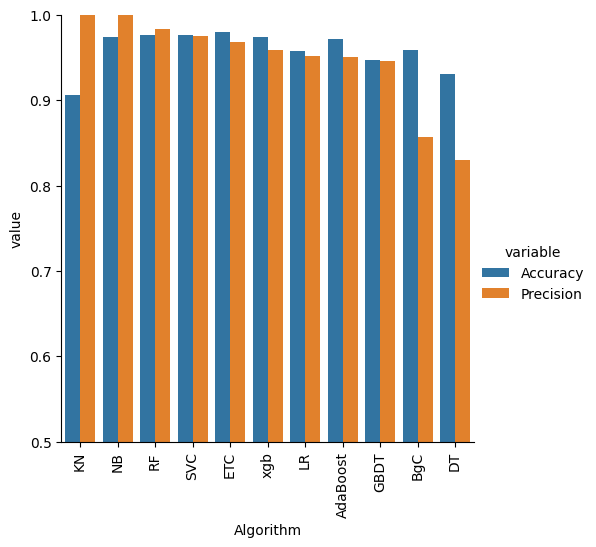

In [65]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [66]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [67]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [68]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [69]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [70]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [71]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000
1,NB,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000
2,RF,0.976789,0.983051,0.976789,0.983051,0.976789,0.983051,0.976789,0.983051
3,SVC,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
4,ETC,0.980658,0.968254,0.980658,0.968254,0.980658,0.968254,0.980658,0.968254
5,xgb,0.973888,0.958678,0.973888,0.958678,0.973888,0.958678,0.973888,0.958678
6,LR,0.957447,0.951923,0.957447,0.951923,0.957447,0.951923,0.957447,0.951923
7,AdaBoost,0.971954,0.950413,0.971954,0.950413,0.971954,0.950413,0.971954,0.950413
8,GBDT,0.946809,0.946237,0.946809,0.946237,0.946809,0.946237,0.946809,0.946237
9,BgC,0.958414,0.857143,0.958414,0.857143,0.958414,0.857143,0.958414,0.857143


In [72]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [73]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [74]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [75]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 0.991869918699187


In [76]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [77]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9552238805970149


In [78]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))